In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

In [2]:
df = pd.read_csv('Cancer_Data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Данные по диагностике рака содержат информаю по 32 характеристикам, всего 569 записей. Пропусков в данных нет.
30 характеристики (переменные): имеют числовое значение (непрерывное числовое значение), тип float64, id записи является числовым целочисленным значением, а таргетная переменная diagnosis - категориальная, тип object.

При импорте данных создался пустой слобец, удалим его.

In [4]:
df.drop('Unnamed: 32', axis=1, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


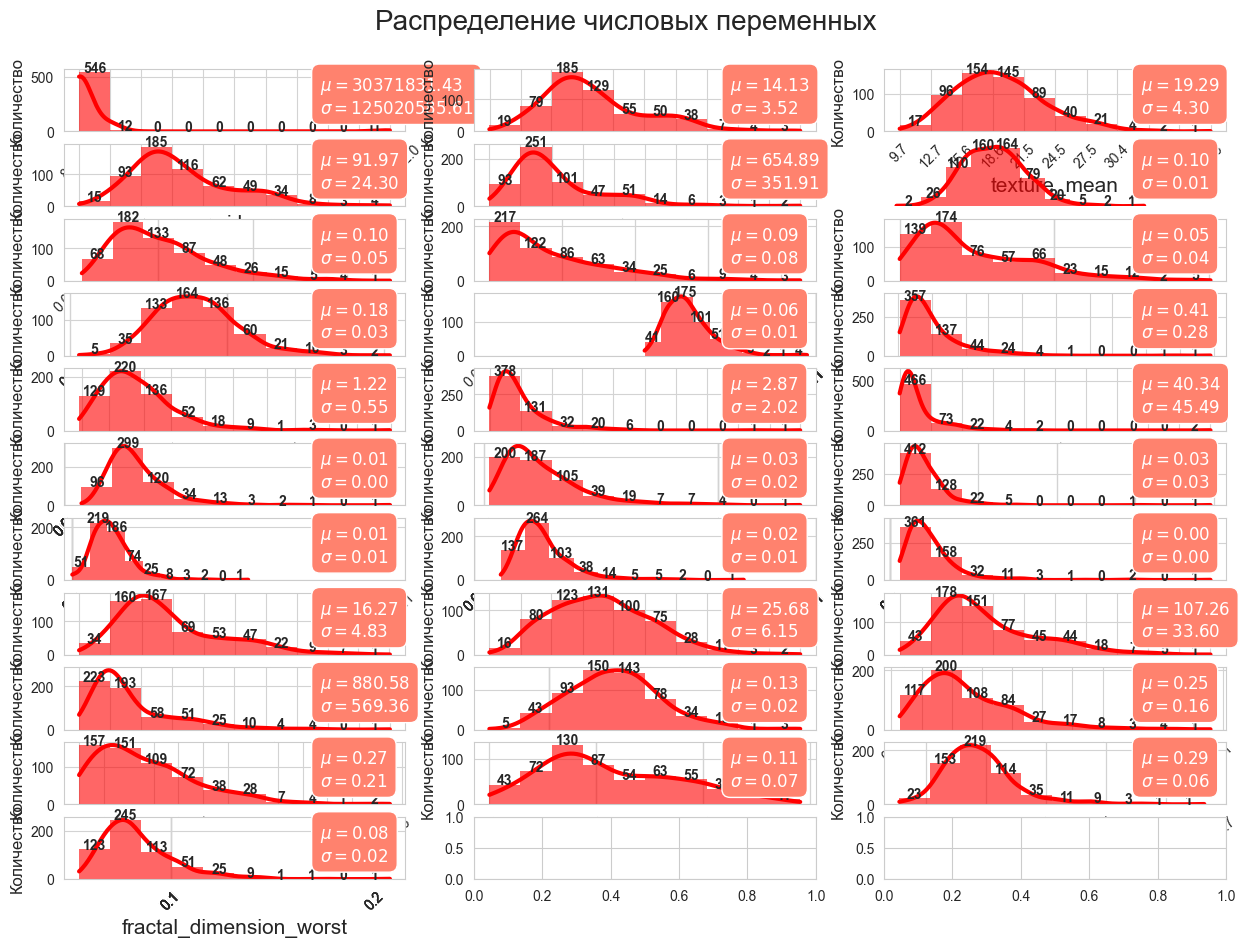

In [14]:
X = df.drop('diagnosis', axis=1)
fig, ax = plt.subplots(nrows=11, ncols=3, figsize=(15, 10))

# Цикл для построения гистограмм для каждого числового признака
for i, col in enumerate(X.columns):
    x = i // 3
    y = i % 3
    values, bin_edges = np.histogram(X[col],
                                     range=(X[col].min(), X[col].max()))

    graph = sns.histplot(data=X, x=col, bins=bin_edges, kde=True, ax=ax[x, y],
                         edgecolor='none', color='red', alpha=0.6, line_kws={'lw': 3})
    ax[x, y].set_xlabel(col, fontsize=15)
    ax[x, y].set_ylabel('Количество', fontsize=12)
    ax[x, y].set_xticks(np.round(bin_edges, 1))
    ax[x, y].set_xticklabels(ax[x, y].get_xticks(), rotation=45)
    ax[x, y].grid(color='lightgrey')

    for j, p in enumerate(graph.patches):
        ax[x, y].annotate('{}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() + 1),
                          ha='center', fontsize=10, fontweight="bold")

    textstr = '\n'.join((
        r'$\mu=%.2f$' % X[col].mean(),
        r'$\sigma=%.2f$' % X[col].std()
    ))
    ax[x, y].text(0.75, 0.9, textstr, transform=ax[x, y].transAxes, fontsize=12, verticalalignment='top',
                  color='white', bbox=dict(boxstyle='round', facecolor='#ff826e', edgecolor='white', pad=0.5))

ax[1, 2].axis('off')
plt.suptitle('Распределение числовых переменных', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

<Axes: ylabel='Cancer'>

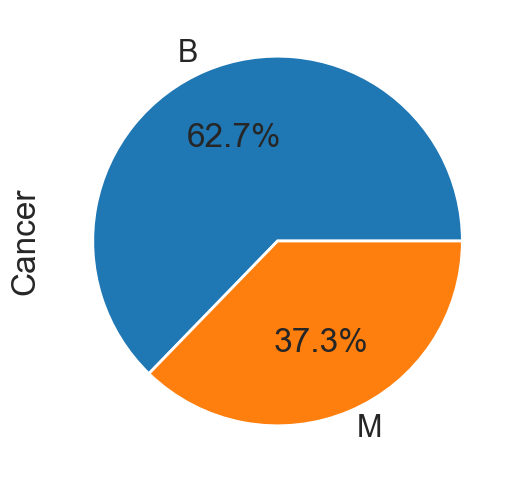

In [16]:
sns.set_style('darkgrid')
sns.set_context('poster')
plt.rcParams['figure.figsize'] = [8,6]
df.groupby('diagnosis').size().plot(kind='pie',
                                       y = "diagnosis",
                                       label = "Cancer",
                                       autopct='%1.1f%%')

Таким образом, видим, что классы рапределены не равномерно. 62,7% данных содержат данные доброкачественных опухолей и 37,3% данных с злокачественных опухолей

Переведем категориальный признак в бинарный с значениями: 0 - доброкачественная опухоль, 1 - злокачественная опухоль.

In [51]:
Y = df['diagnosis']
Y = [0 if i == 'B' else 1 for i in Y]

Поделим выборку на тернировочнйю и тестовую и нормолизуем данные

In [25]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [26]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
x_train_scale = scale.fit_transform(x_train)
x_test_scale = scale.fit_transform(x_test)

Построим модель логистической регрессии с параметрами по умолчанию

In [27]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()
lg.fit(x_train_scale, y_train)

LogisticRegression()

In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = lg.predict(x_test_scale)
print('accuracy', round(accuracy_score(y_test, y_pred), 3))
print('precision', round(precision_score(y_test, y_pred, average='binary'), 3))
print('recall', round(recall_score(y_test, y_pred, average='binary'), 3))
print('f1', round(f1_score(y_test, y_pred, average='binary'), 3))

accuracy 0.982
precision 1.0
recall 0.953
f1 0.976


Accuracy (0.982)- это метрика, которая характеризует качество модели, агрегированное по всем классам. Это полезно, когда классы для нас имеют одинаковое значение. В нашем случае класс c злокачественными опухолями имеет для нас большее значение. То есть для нас важнее выявить как можно больше именно злокачественных опухолей.

Precision - точность (1.0), показывает, что из всех опухолей, которых  модель определила, как злокачестыенные, все являются действителньо злокачественными.
Recall - полнота (0.953), показывает, что модель определила 95% всех злокачественных опухолей.
F1 мера (0.976), является гармоническим средним точности и полноты и является более точной метрикой для оценки модели бинарной классификации при несбалансированных по классам данных.

Построим матрицу ошибок (confusion matrix), чтобы увидеть сколько именно опухолей было диагностировано корректно.

In [32]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[71,  0],
       [ 2, 41]])

Видно, что все 2 злокачественные опухоли не были диагностированы корректно.

Попробуем улучшить качество модели, попробуем разные значения показателя C, который является обратным значением силы регилиризации. 

In [37]:
for c in [0.01, 0.1, 1, 10, 100]:
    lg = LogisticRegression(C=c)
    lg.fit(x_train_scale, y_train) 
    y_pred = lg.predict(x_test_scale)
    print('C=',c, end='\t')
    print('precision', round(precision_score(y_test, y_pred, average='binary'),3), end='\t')
    print('recall', round(recall_score(y_test, y_pred, average='binary'), 3), end='\t')
    print('f1', round(f1_score(y_test, y_pred, average='binary'),3))
    

C= 0.01	precision 1.0	recall 0.884	f1 0.938
C= 0.1	precision 1.0	recall 0.953	f1 0.976
C= 1	precision 1.0	recall 0.953	f1 0.976
C= 10	precision 1.0	recall 0.953	f1 0.976
C= 100	precision 0.909	recall 0.93	f1 0.92


Видно, что при очень маленьких значениях С, так и при очень больших, мы получаем снижения recall и f1. что говорит, о том, что,как в случае того, что мы говорим, что нужно верить данным модели - модель переобучается, а в случае , когда говорим. что данным верить нельзя, модель не дообучается.  В итоге качество моделей падает.


Построим модель логистической регрессии с использованием стохастического градиентного спуска.

In [39]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(x_train_scale, y_train) 
y_pred = sgd.predict(x_test_scale)
print('precision', round(precision_score(y_test, y_pred, average='binary'),3), end='\t')
print('recall', round(recall_score(y_test, y_pred, average='binary'), 3), end='\t')
print('f1', round(f1_score(y_test, y_pred, average='binary'),3))

precision 0.952	recall 0.93	f1 0.941


В данном случае, SGDclassifier показал, чуть менее точные результаты. 

Сравним различные оптимизаторы, сравним, как результаты работы модели, так и время работы.

In [50]:
import time

for solver in ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']:
    lg = LogisticRegression(solver=solver)
    start_time = time.time()
    lg.fit(x_train_scale, y_train) 
    end_time = time.time()
    y_pred = lg.predict(x_test_scale)
    print('solver=',solver, end='\t\t\t')
    print('precision', round(precision_score(y_test, y_pred, average='binary'),3), end='\t\t\t')
    print('recall', round(recall_score(y_test, y_pred, average='binary'), 3), end='\t\t\t')
    print('f1', round(f1_score(y_test, y_pred, average='binary'),3), end='\t\t')
    print('time=', end_time - start_time)


solver= lbfgs			precision 1.0			recall 0.953			f1 0.976		time= 0.003000020980834961
solver= liblinear			precision 1.0			recall 0.953			f1 0.976		time= 0.0010001659393310547
solver= newton-cg			precision 1.0			recall 0.953			f1 0.976		time= 0.003000974655151367
solver= newton-cholesky			precision 1.0			recall 0.953			f1 0.976		time= 0.002005338668823242
solver= sag			precision 1.0			recall 0.953			f1 0.976		time= 0.007999181747436523
solver= saga			precision 1.0			recall 0.953			f1 0.976		time= 0.007998466491699219


Из расчетов видно, что метрики при всех расчетах получились абсолютно одинаковые. 

Однако мы видим значительную разницу во времени обучения моделей при использовании разных оптимизаторов.

Самым быстрым оптимизатором в данном случае оказался liblinier, то есть один против всех.
Также хорошие результаты показали:
- newton-cholesky - время в 2 раза больше, чем liblinier;
- lbfgs - алгоритм по умолчанию и newton-cg - в 3 раза медленнее
- солверы sag и saga - показали значительне замедление, возможно это связано с тем, что у наших данных присутствует неравнмерное распределение данных.

Таким образом, самыми быстрыми оказались солверы, которые предназначены именно для работы с бинарными классификаторами.